# (Dataset Exploration)
## by (Raymond Tsang)

## Preliminary Wrangling


This dataset was obtained from kaggle.com. https://www.kaggle.com/spscientist/students-performance-in-exams It's about students' test performance on math, reading and writing.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore') # not show all code output warning
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [10]:
df=pd.read_csv("StudentsPerformance.csv")

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


checking for missing data

In [12]:
df.isnull().any().any() 

False

I rename some column names because some of them longer than others. Also it's much easier to code.

In [29]:
df.rename(columns={'race/ethnicity':'ethn_groups',
                          'parental level of education':'educations',
                          'test preparation course':'test_prep',
                          'math score':'math',
                          'reading score':'reading',
                          'writing score':'writing'},inplace=True) 
                

In [30]:
df.head()

,gender,ethn_groups,educations,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


There are all lower case, I have to capitalize first letter of words.

In [31]:
# Use function to capitalize all first letter of word
def Cap(a):
    return a.str.title()
df[['gender','ethn_groups','lunch','test_prep']]=df[['gender','ethn_groups','lunch','test_prep']].apply(Cap)

In [33]:
# This code used for capitalize first letter word except 's
import string 
df['educations'] = df['educations'].apply(lambda x: string.capwords(x))

    PART II
Save clean data.

In [7]:
df.to_csv("StudentsPerformance_clean.csv",index=False)  # save clean dataset

In [3]:
df=pd.read_csv("StudentsPerformance_clean.csv")

In [3]:
df.sample(5)

,gender,ethn_groups,educations,lunch,test_prep,math,reading,writing
780,Female,Group D,Associate's Degree,Free/Reduced,None,46,56,57
689,Male,Group E,Some College,Free/Reduced,None,93,90,83
397,Female,Group C,Associate's Degree,Standard,None,85,89,95
116,Female,Group B,Bachelor's Degree,Free/Reduced,None,75,85,82
1,Female,Group C,Some College,Standard,Completed,69,90,88


Re-arrange categorical variables

In [4]:
education = ['Some High School','High School','Some College',"Associate's Degree","Bachelor's Degree","Master's Degree"]
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        edu = pd.api.types.CategoricalDtype(ordered = True, categories = education)
        df['educations'] = df['educations'].astype(edu)
else: # compatibility for v.20
        df['educations'] = df['educations'].astype('category', ordered = True,
                                                         categories = education)

### What is the structure of your dataset?

>This dataset consists of 3 test scores performed by students who are female and male, their levels of education and whether they took test preparation courses or not. Mainly if their scores influence by their education backgroups or/and test preparation. 

### What is/are the main feature(s) of interest in your dataset?

> Which gender has higher education and test score

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
>I will pick test preparation courses to support my additional finding

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [17]:
df[['math','reading','writing']].describe() # get basic statistic information

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

Find out how many students have their college degrees and not

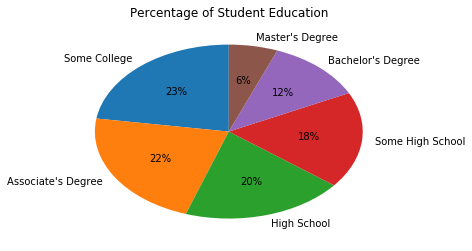

In [4]:
a=df['educations'].value_counts() # summarize all number of education
plt.pie(data=df,x=a,autopct='%1.0f%%', labels=a.index,startangle=90) # add percentage in pie for each categgory
plt.title("Percentage of Student Education")  # Add title
plt.show()

This chart shows most of test takers have only some college and associate degrees. Small percentage is master degree.

I use basic histgram chart to find out which type of distribution for math, reading and writing.

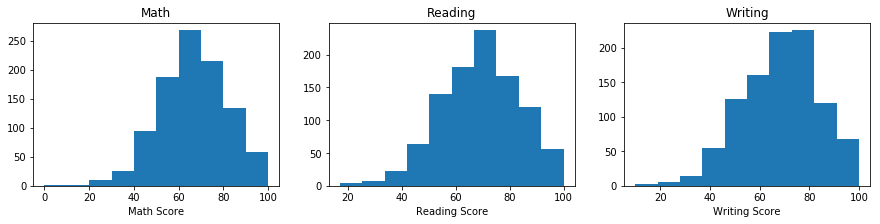

In [9]:
plt.figure(figsize=[15,3]) # add chart size
plt.subplot(1,3,1) # add sub-plot

plt.hist(data=df,x="math")
plt.title("Math")
plt.xlabel("Math Score")

plt.subplot(1,3,2)
plt.hist(data=df,x="reading")
plt.xlabel("Reading Score")
plt.title("Reading")

plt.subplot(1,3,3)
plt.hist(data=df,x="writing")
plt.xlabel("Writing Score")
plt.title("Writing")
plt.show()

All three variables have normal distributions, their each mean around between 60s to 70s.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All three test scores are normal distribution. Their means are in upper 60s. I don't think I need any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No major changes have been done. But I renamed some column names and capitalized first letter. Also rearranged categorical variables in orders.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Let's investigate relationship between levels of education & test scores

In [91]:
df.groupby("educations")['math'].describe()  # 

,count,mean,std,min,25%,50%,75%,max
educations,,,,,,,,
Some High School,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0
High School,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
Some College,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
Associate's Degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
Bachelor's Degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
Master's Degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0


    This section shows educations vs all three tests, math, reading and writing. The information above shows statistical information.

Investigating how level of education affecting math test.

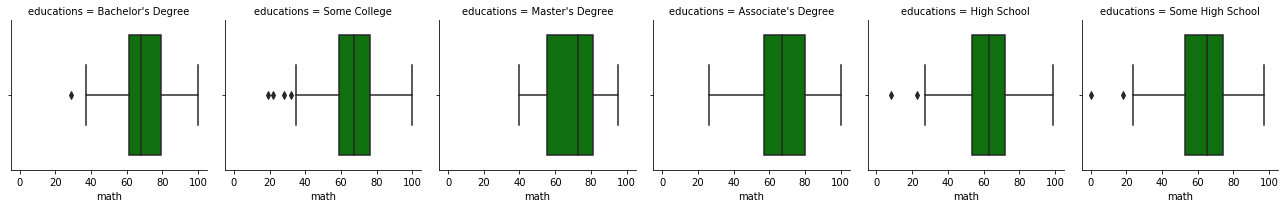

In [24]:
g=sb.FacetGrid(data=df, col="educations") # use FacetGrid to investigation two variables
g.map(sb.boxplot, "math", color="g")

This chart shows higher education performed better in 75% and average, people without degrees have more outliers.

Investigating how level of education affecting reading test.

In [92]:
df.groupby("educations")['reading'].describe() # getting statistical information for reading

,count,mean,std,min,25%,50%,75%,max
educations,,,,,,,,
Some High School,179.0,66.938547,15.479295,17.0,56.5,67.0,79.00,100.0
High School,196.0,64.704082,14.132130,24.0,54.0,66.0,74.25,99.0
Some College,226.0,69.460177,14.057049,23.0,60.0,70.5,79.75,100.0
Associate's Degree,222.0,70.927928,13.868948,31.0,61.0,72.5,81.00,100.0
Bachelor's Degree,118.0,73.000000,14.285250,41.0,63.0,73.0,82.75,100.0
Master's Degree,59.0,75.372881,13.775163,42.0,65.5,76.0,84.50,100.0


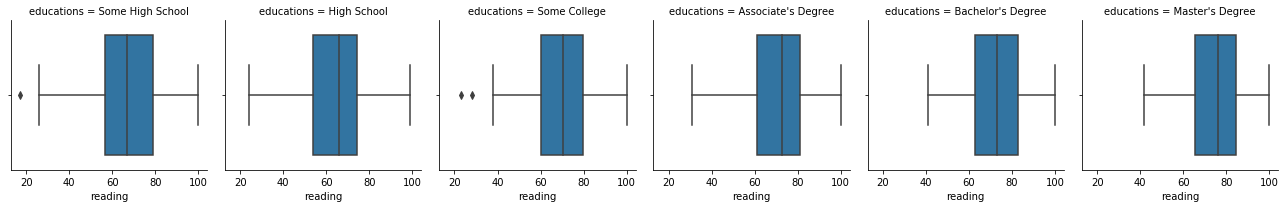

In [21]:
g=sb.FacetGrid(data=df, col="educations")
g.map(sb.boxplot, "reading")

People with different education level did good in reading test, althrough from  master's degree average scored higher to some high school. But some people from different level received same max result. There are outliers seen in some college and some high school. 

In [93]:
df.groupby("educations")['writing'].describe()

,count,mean,std,min,25%,50%,75%,max
educations,,,,,,,,
Some High School,179.0,64.888268,15.736197,10.0,54.0,66.0,77.0,100.0
High School,196.0,62.448980,14.085907,15.0,52.0,64.0,73.0,100.0
Some College,226.0,68.840708,15.012331,19.0,60.0,70.0,79.0,99.0
Associate's Degree,222.0,69.896396,14.311122,35.0,58.0,70.5,80.0,100.0
Bachelor's Degree,118.0,73.381356,14.728262,38.0,62.5,74.0,83.0,100.0
Master's Degree,59.0,75.677966,13.730711,46.0,67.0,75.0,85.0,100.0


Investigating how level of education affecting writing test.

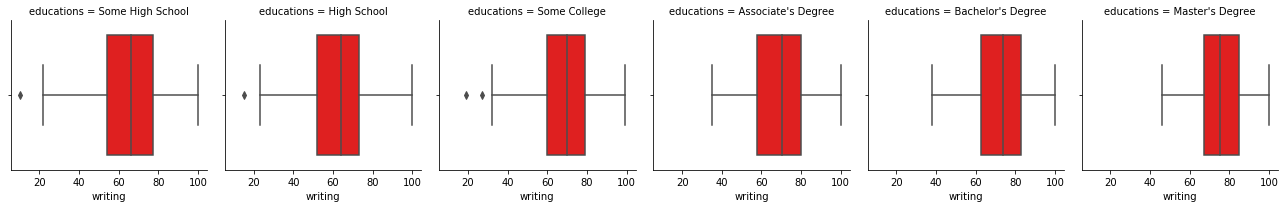

In [77]:
g=sb.FacetGrid(data=df, col="educations")
g.map(sb.boxplot, "writing",color="r")

In writing plot shows people with some high school did better than high school (64.88 vs 62.44).  People with master's degree are on top. There are outliers seen in people without a degree. 15.736 in Some high school, 14.08 in high school, and 19 and 20s approx in some college.

Relationship between reading and writing. 
>Although each test is considered independent variables, i want to see there is any correlations between English subject and math. First, writing vs reading, and then math against english test.

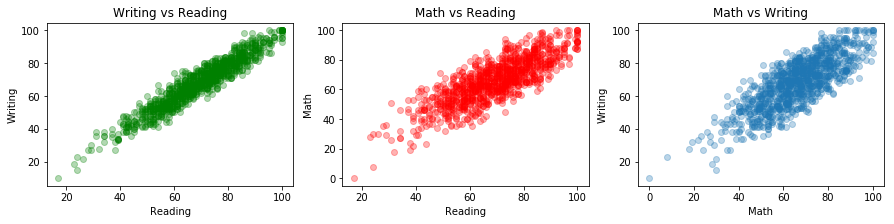

In [79]:
plt.figure(figsize=[15,3]) #create a figure and size
plt.subplot(1,3,1) # create subplot

plt.scatter(x="reading", y="writing",alpha=0.3, color="g",data=df)
plt.title("Writing vs Reading")
plt.xlabel("Reading")
plt.ylabel("Writing")

plt.subplot(1,3,2)
plt.scatter(y="math", x="reading",alpha=0.3,color="r",data=df)
plt.title("Math vs Reading")
plt.xlabel("Reading")
plt.ylabel("Math")
           
plt.subplot(1,3,3)
plt.scatter(x="math", y="writing",alpha=0.3, data=df)
plt.title("Math vs Writing")
plt.xlabel("Math")
plt.ylabel("Writing")
plt.show()


The scatter plot shows writing and reading have formed thin scatter point line. It shows there's strong correlations between writing an reading. However, in comparison math vs english test, point scatter more widely but show there is some correlation.

Relationship bewteen those who took preparation course or none.

In [101]:
df.groupby("test_prep")['reading'].describe() # getting statistical information 

,count,mean,std,min,25%,50%,75%,max
test_prep,,,,,,,,
Completed,358.0,73.893855,13.638384,37.0,65.0,75.0,84.0,100.0
None,642.0,66.534268,14.463885,17.0,57.0,67.0,76.0,100.0


            This section I use test preparation course against three tests.
>Reading with preparation course & None


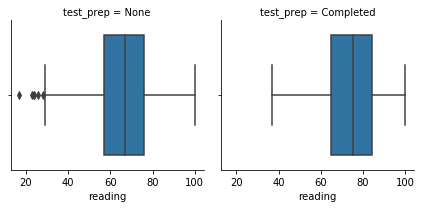

In [32]:
g=sb.FacetGrid(data=df, col="test_prep") # use FacetGrid to plot two variables
g.map(sb.boxplot, "reading") # map boxplot with FacetGrid

There are many outliers seen in none preparation course. No outliers seen in test preparation.  Overall, test preparation did help students to do better.

In [102]:
df.groupby("test_prep")['writing'].describe()# getting statistical information 

,count,mean,std,min,25%,50%,75%,max
test_prep,,,,,,,,
Completed,358.0,74.418994,13.375335,36.0,66.0,76.0,83.0,100.0
None,642.0,64.504673,14.999661,10.0,54.0,65.0,74.0,100.0


Writing with preparation course and None

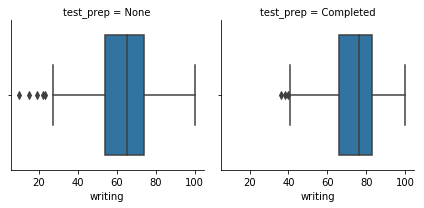

In [14]:
g=sb.FacetGrid(data=df, col="test_prep")# use FacetGrid to plot two variables
g.map(sb.boxplot, "writing")# map boxplot with FacetGrid

In writing, outliers seen in both comparison. There are more in none preparation. Overall, Test preparation also help to increased scores. 74.41-64.50=9.91 in average.

In [103]:
df.groupby("test_prep")['math'].describe() # getting statistical information 

,count,mean,std,min,25%,50%,75%,max
test_prep,,,,,,,,
Completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
None,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


math with preparation course and None

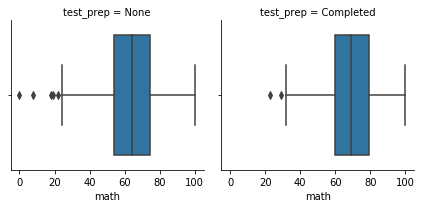

In [15]:
g=sb.FacetGrid(data=df, col="test_prep")  # use FacetGrid to plot two variables
g.map(sb.boxplot, "math")  # map boxplot with FacetGrid

Even there are outliers in both test preparation and none. People with test preparation did slightly better. 69.69-64.07=5.62 in average.

I am interested to find out what are percentage that men and women have their educations.

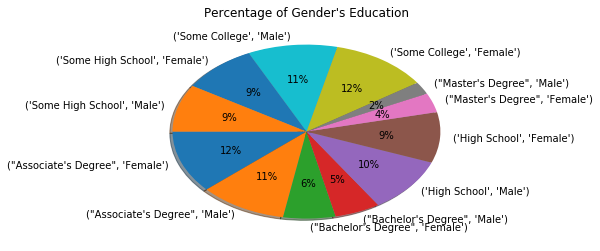

In [32]:
g=df.groupby("educations")['gender'].value_counts() # counting and summarize all educations for each male and female

plt.pie(data=df,x=g,autopct='%1.0f%%', shadow=True,labels=g.index,startangle=180) # add percentage in pie for each categgory
plt.title("Percentage of Gender's Education")  # Add title
plt.show()

The chart shows most people have associate degrees both male 11% and female 12%. Only small percentage with master's degree. 


There are outliers also seen in math test in both test preparation course and None. None has more. Averge people who took course did better in math. 69.69-64.07=5.62 difference.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For those who have higher education proved higher test scores. Test preparation courses do help to increase scores. Hoever, statists and plots show that people performed average in both writing and math, especially math.  In Reading people did well regradless their educational backgroup. Bar chart shows most test takers have associate degrees and some colleges. However, people with higher educations performed better, such as bachelor's degree and master's degree.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Relationship between reading and writing have closed relationship.  However, math is apart from reading and writing it is because English include reading and writing. Math is dealing numerical problems.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> In this section, I am going to investigate three variables.
> First combining education and test preparation vs tests.  I use cluster bar for visualization

In [94]:
df.groupby(['educations','test_prep'])['math'].describe() # getting statistical information

count       mean        std   min    25%   50%  \
educations         test_prep                                                   
Some High School   Completed   77.0  66.701299  14.583755  29.0  59.00  65.0   
                   None       102.0  61.078431  16.533007   0.0  49.00  64.0   
High School        Completed   56.0  65.000000  12.999301  23.0  57.00  67.0   
                   None       140.0  60.992857  15.002876   8.0  52.00  62.0   
Some College       Completed   77.0  71.454545  13.899589  42.0  63.00  70.0   
                   None       149.0  64.892617  14.052095  19.0  58.00  65.0   
Associate's Degree Completed   82.0  71.829268  14.347370  40.0  61.25  71.0   
                   None       140.0  65.571429  15.118783  26.0  53.00  65.0   
Bachelor's Degree  Completed   46.0  73.282609  15.252924  39.0  66.00  72.5   
                   None        72.0  66.902778  14.298783  29.0  59.00  65.5   
Master's Degree    Completed   20.0  70.600000  14.615781  46.0  60.25  71.0   
                   None        39.0  69.307692  15.592093  40.0  54.50  73.0   

                                75%    max  
educations         test_prep                
Some High School   Completed  77.00   97.0  
                   None       73.00   94.0  
High School        Completed  73.25   88.0  
                   None       71.00   99.0  
Some College       Completed  82.00  100.0  
                   None       74.00  100.0  
Associate's Degree Completed  82.00  100.0  
                   None       77.75  100.0  
Bachelor's Degree  Completed  84.50  100.0  
                   None       77.25  100.0  
Master's Degree    Completed  81.75   94.0  
                   None       81.00   95.0

>All education with test preparation vs math

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

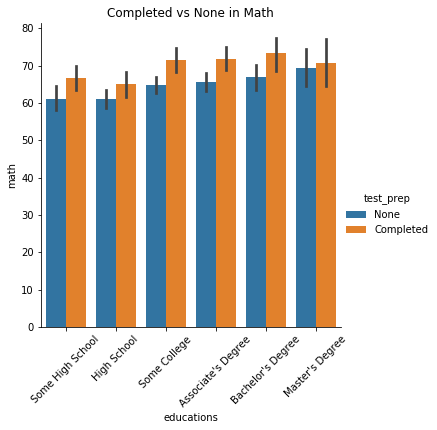

In [81]:
sb.catplot(x="educations", y="math", hue="test_prep", kind="bar", data=df)
plt.title("Completed vs None in Math")
plt.xticks(rotation=45)

Result shows test preparation people master's degree(70.06) fall behind some college(71.45), assoicate's degree(71.82) and bachelor's degree(73.21), averagely. But for non-preparation, master'degree did better than the rests.

In [95]:
df.groupby(['educations','test_prep'])['reading'].describe() # getting statistical information

count       mean        std   min    25%   50%  \
educations         test_prep                                                   
Some High School   Completed   77.0  70.948052  14.137386  37.0  61.00  71.0   
                   None       102.0  63.911765  15.823346  17.0  54.00  64.5   
High School        Completed   56.0  67.839286  13.447239  41.0  57.75  68.5   
                   None       140.0  63.450000  14.250748  24.0  53.00  64.0   
Some College       Completed   77.0  75.987013  12.068329  47.0  71.00  78.0   
                   None       149.0  66.087248  13.856374  23.0  58.00  66.0   
Associate's Degree Completed   82.0  76.170732  12.562736  43.0  68.25  77.0   
                   None       140.0  67.857143  13.716330  31.0  57.00  68.0   
Bachelor's Degree  Completed   46.0  76.739130  14.100331  42.0  66.50  75.0   
                   None        72.0  70.611111  13.979417  41.0  60.00  72.0   
Master's Degree    Completed   20.0  78.250000  14.927456  42.0  69.50  79.0   
                   None        39.0  73.897436  13.100412  53.0  63.50  72.0   

                               75%    max  
educations         test_prep               
Some High School   Completed  83.0  100.0  
                   None       74.0   97.0  
High School        Completed  79.0   99.0  
                   None       73.0   95.0  
Some College       Completed  84.0   97.0  
                   None       76.0  100.0  
Associate's Degree Completed  85.0  100.0  
                   None       77.0  100.0  
Bachelor's Degree  Completed  85.5  100.0  
                   None       79.0  100.0  
Master's Degree    Completed  89.5   99.0  
                   None       83.0  100.0

>All education with test preparation vs reading

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

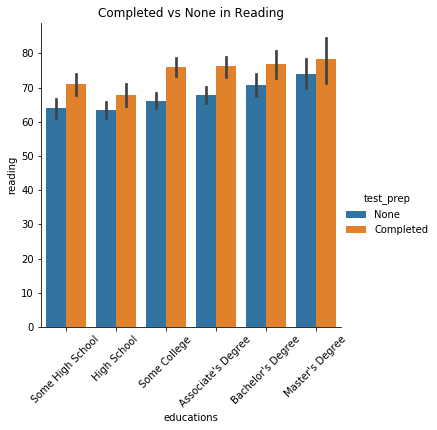

In [82]:
sb.catplot(x="educations", y="reading", hue="test_prep", kind="bar", data=df) # plotting with seaborn cluster bar
plt.title("Completed vs None in Reading") #set title
plt.xticks(rotation=45) # rotation to avoid overlap

In reading, master's degree received higher score than the rest. People without finished high school did better than people with high school. People with some college, assoicate degree and bachelor's degree almost in same level with test preparation.

In [96]:
df.groupby(['educations','test_prep'])['writing'].describe()  # getting statistical information

count       mean        std   min    25%   50%  \
educations         test_prep                                                   
Some High School   Completed   77.0  70.363636  13.480892  40.0  60.00  72.0   
                   None       102.0  60.754902  16.110655  10.0  51.00  61.0   
High School        Completed   56.0  68.053571  13.191484  36.0  59.50  68.0   
                   None       140.0  60.207143  13.848355  15.0  51.00  62.0   
Some College       Completed   77.0  76.519481  11.566297  51.0  70.00  77.0   
                   None       149.0  64.872483  15.079648  19.0  56.00  66.0   
Associate's Degree Completed   82.0  76.817073  12.681403  44.0  68.00  79.0   
                   None       140.0  65.842857  13.678882  35.0  56.00  67.0   
Bachelor's Degree  Completed   46.0  78.695652  13.283021  38.0  70.25  79.5   
                   None        72.0  69.986111  14.684948  38.0  60.50  70.0   
Master's Degree    Completed   20.0  80.100000  13.606887  46.0  73.50  79.5   
                   None        39.0  73.410256  13.402117  50.0  65.50  72.0   

                                75%    max  
educations         test_prep                
Some High School   Completed  79.00  100.0  
                   None       74.50   96.0  
High School        Completed  78.00  100.0  
                   None       70.00   90.0  
Some College       Completed  85.00   99.0  
                   None       75.00   99.0  
Associate's Degree Completed  86.75   99.0  
                   None       74.00  100.0  
Bachelor's Degree  Completed  87.75  100.0  
                   None       81.00  100.0  
Master's Degree    Completed  90.25  100.0  
                   None       84.00  100.0

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

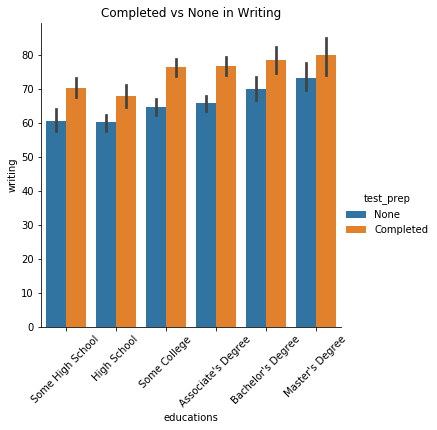

In [83]:
sb.catplot(x="educations", y="writing", hue="test_prep", kind="bar", data=df) # plotting with seaborn cluster bar
plt.title("Completed vs None in Writing") # Set title
plt.xticks(rotation=45) # rotation to avoid overlap

In writing exam, people with some high school and high school performed same without preparation. People with higher education performed slighly higher without completed test preparation. But they made big differnece with test preparation.

>In this section, I am going to compare each gender test performance

In [22]:
df.gender.value_counts() # count total female and male in population

Female    518
Male      482
Name: gender, dtype: int64

I am interested to find out which gender better perform in test score. I randomly draw 900 students is because if I used a whole population, it appeared females has more than males. 518-482=36. 36 difference will produce bias data in plots.

In [27]:
sample=df.sample(900) # Obtaining sample from population

In [21]:
sample.gender.value_counts() # total each gender in sample

Female    454
Male      446
Name: gender, dtype: int64

Now sample draw 454-446=8 difference.

Re-arrange categorical orders

In [28]:

educat = ['Some High School','High School','Some College',"Associate's Degree","Bachelor's Degree","Master's Degree"]
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        educ = pd.api.types.CategoricalDtype(ordered = True, categories = educat)
        sample['educations'] = sample['educations'].astype(educ)
else: # compatibility for v.20
        sample['educations'] = sample['educations'].astype('category', ordered = True,
                                                         categories = educat)

In [97]:
sample.groupby(['educations','gender'])['reading'].describe() # Getting statistical information

count       mean        std   min    25%   50%  \
educations         gender                                                   
Some High School   Female   82.0  70.646341  15.184765  32.0  60.00  72.0   
                   Male     76.0  65.289474  13.995062  26.0  55.50  66.0   
High School        Female   87.0  67.528736  14.291678  24.0  59.50  68.0   
                   Male     95.0  61.484211  13.708099  24.0  52.00  62.0   
Some College       Female  105.0  73.152381  12.233137  38.0  65.00  73.0   
                   Male    100.0  65.330000  14.563726  23.0  57.00  63.5   
Associate's Degree Female  102.0  74.205882  13.280178  31.0  64.25  76.0   
                   Male     95.0  67.421053  13.753591  37.0  56.00  68.0   
Bachelor's Degree  Female   52.0  77.153846  14.429524  41.0  69.75  76.5   
                   Male     51.0  68.078431  13.061153  42.0  59.50  67.0   
Master's Degree    Female   34.0  76.911765  15.023956  53.0  64.25  74.0   
                   Male     21.0  74.285714  10.184021  53.0  67.00  77.0   

                             75%    max  
educations         gender                
Some High School   Female  82.00  100.0  
                   Male    74.25   88.0  
High School        Female  76.50   99.0  
                   Male    72.50   91.0  
Some College       Female  82.00  100.0  
                   Male    77.00   97.0  
Associate's Degree Female  84.75  100.0  
                   Male    77.00  100.0  
Bachelor's Degree  Female  86.50  100.0  
                   Male    75.00  100.0  
Master's Degree    Female  91.00  100.0  
                   Male    82.00   89.0

I use gender's educational level in reading.

Text(0.5,1,'Males vs Females in Reading')

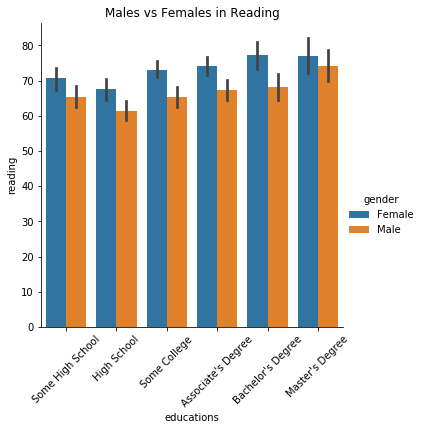

In [29]:
sb.catplot(x="educations", y="reading", hue="gender", kind="bar", data=sample) #Plot with clusterbar
plt.xticks(rotation=45) #set rotation
plt.title("Males vs Females in Reading") # set title

The plot shows females performed better than male in reading overall. Male in some high school did better than males in high school. 

In [98]:
sample.groupby(['educations','gender'])['writing'].describe() # getting statistcial information

count       mean        std   min    25%   50%  \
educations         gender                                                   
Some High School   Female   82.0  69.963415  15.443601  27.0  59.25  72.5   
                   Male     76.0  61.723684  13.642677  22.0  53.00  62.0   
High School        Female   87.0  66.183908  14.655366  23.0  58.50  68.0   
                   Male     95.0  58.610526  12.876909  15.0  50.00  59.0   
Some College       Female  105.0  73.695238  13.113501  32.0  66.00  74.0   
                   Male    100.0  63.290000  14.968178  19.0  54.00  62.5   
Associate's Degree Female  102.0  73.990196  13.387962  38.0  65.00  74.0   
                   Male     95.0  65.452632  14.005902  35.0  54.50  66.0   
Bachelor's Degree  Female   52.0  78.211538  14.038234  38.0  70.00  79.5   
                   Male     51.0  67.666667  14.199531  38.0  57.00  68.0   
Master's Degree    Female   34.0  77.676471  14.788859  54.0  66.25  76.5   
                   Male     21.0  73.904762  10.995021  50.0  69.00  75.0   

                             75%    max  
educations         gender                
Some High School   Female  80.75  100.0  
                   Male    73.00   87.0  
High School        Female  76.00  100.0  
                   Male    68.00   86.0  
Some College       Female  82.00   99.0  
                   Male    74.00   99.0  
Associate's Degree Female  84.00  100.0  
                   Male    77.00   95.0  
Bachelor's Degree  Female  87.00  100.0  
                   Male    76.00  100.0  
Master's Degree    Female  91.00  100.0  
                   Male    84.00   90.0

male vs female in writing with all educational levels.

Text(0.5,1,'Males vs Females in Writing')

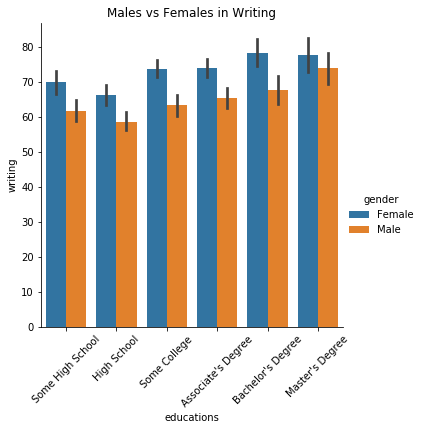

In [30]:
sb.catplot(x="educations", y="writing", hue="gender", kind="bar", data=sample)
plt.xticks(rotation=45)
plt.title("Males vs Females in Writing")

Same in reading, females performed better than males. Males in some high school had higher score than male with high school.

Males vs females in math test with all educational level


In [99]:
sample.groupby(['educations','gender'])['math'].describe() # Getting statistical information

count       mean        std   min    25%   50%  \
educations         gender                                                   
Some High School   Female   82.0  61.048780  15.415963  18.0  49.25  63.5   
                   Male     76.0  68.486842  13.672838  30.0  59.75  68.0   
High School        Female   87.0  58.988506  15.426114   8.0  50.00  61.0   
                   Male     95.0  64.778947  13.590656  27.0  57.00  66.0   
Some College       Female  105.0  64.628571  13.294199  19.0  58.00  64.0   
                   Male    100.0  68.890000  15.023816  28.0  59.00  69.0   
Associate's Degree Female  102.0  64.843137  15.070623  26.0  54.00  64.5   
                   Male     95.0  70.600000  14.551011  40.0  61.00  72.0   
Bachelor's Degree  Female   52.0  67.961538  16.408942  29.0  60.50  66.0   
                   Male     51.0  70.882353  14.367529  37.0  62.00  70.0   
Master's Degree    Female   34.0  66.441176  15.694414  40.0  53.25  64.5   
                   Male     21.0  75.952381  12.179804  49.0  71.00  79.0   

                             75%    max  
educations         gender                
Some High School   Female  72.00   97.0  
                   Male    78.25   94.0  
High School        Female  69.00   99.0  
                   Male    73.00   94.0  
Some College       Female  73.00   98.0  
                   Male    79.00  100.0  
Associate's Degree Female  75.75  100.0  
                   Male    81.00  100.0  
Bachelor's Degree  Female  78.25  100.0  
                   Male    82.50  100.0  
Master's Degree    Female  77.75   94.0  
                   Male    84.00   95.0

Text(0.5,1,'Males vs Females in Math')

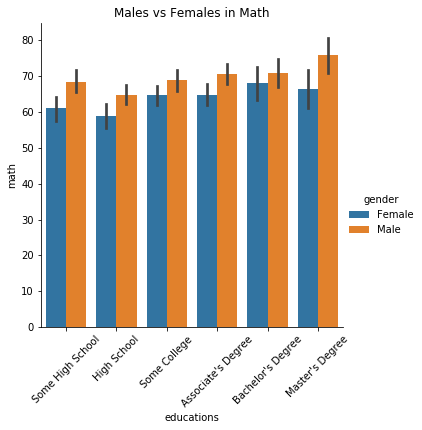

In [31]:
sb.catplot(x="educations", y="math", hue="gender", kind="bar", data=sample) # Use seaborn clusterbar
plt.xticks(rotation=45) # set rotation avoid overlap
plt.title("Males vs Females in Math") # set title

In math test, plot shows males scored higher than females in all levels. Females with some high school performed better than females with high school graduated. There is big difference between each gender in master's degree. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> General speaking,higher education with test preparation course scored higher than in non-college levels. However, it didn't prove in all level. for example, test takers some high school did better than high school in all three tests if some high schoolers took test preparation. Also there is not much difference between some college and assoicate's degree who took test preparation. 

### Were there any interesting or surprising interactions between features?

Female students performed better in reading and writing than male students. However, male students scored higher in math than female students. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!